In [9]:
import spacy

In [10]:
import base64
import string
import re
from collections import Counter
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [11]:
import pandas as pd

In [12]:
import numpy as np

In [13]:
import seaborn as sns
import matplotlib.pyplot as mplt

Importing Data

In [14]:
Data = pd.read_csv('/home/puja/Springer Nature Hackathon/Content Categorization/Content Categorization_Use Case 4/KeywordsDataSet.csv',nrows=30000)

In [15]:
Data

doi  journalid  pubyear     discipline  \
0       10.1186/1471-2407-13-257      12885      NaN    biomedicine   
1       10.1186/1471-2407-13-426      12885      NaN    biomedicine   
2        10.1186/1471-2407-13-18      12885      NaN    biomedicine   
3       10.1186/1471-2407-13-251      12885      NaN    biomedicine   
4       10.1186/1471-2407-13-178      12885      NaN    biomedicine   
5       10.1186/1471-2407-13-261      12885      NaN    biomedicine   
6       10.1186/1471-2407-13-287      12885      NaN    biomedicine   
7       10.1186/1471-2407-13-502      12885      NaN    biomedicine   
8       10.1186/1471-2407-13-303      12885      NaN    biomedicine   
9       10.1186/1471-2407-13-238      12885      NaN    biomedicine   
10      10.1186/1471-2407-13-289      12885      NaN    biomedicine   
11      10.1186/1471-2407-13-369      12885      NaN    biomedicine   
12      10.1186/1471-2407-13-356      12885      NaN    biomedicine   
13      10.1186/1471-2407-13-338      12885      NaN    biomedicine   
14      10.1186/1471-2407-13-458      12885      NaN    biomedicine   
15      10.1186/1471-2407-13-225      12885      NaN    biomedicine   
16      10.1186/1471-2407-13-234      12885      NaN    biomedicine   
17      10.1186/1471-2407-13-527      12885      NaN    biomedicine   
18      10.1186/1471-2407-13-288      12885      NaN    biomedicine   
19      10.1186/1471-2407-13-209      12885      NaN    biomedicine   
20      10.1186/1471-2407-13-544      12885      NaN    biomedicine   
21      10.1186/1471-2407-13-421      12885      NaN    biomedicine   
22      10.1186/1471-2407-13-485      12885      NaN    biomedicine   
23      10.1186/1471-2407-13-425      12885      NaN    biomedicine   
24       10.1186/1471-2407-13-92      12885      NaN    biomedicine   
25      10.1186/1471-2407-13-112      12885      NaN    biomedicine   
26      10.1186/1471-2407-13-525      12885      NaN    biomedicine   
27      10.1186/1471-2407-13-136      12885      NaN    biomedicine   
28      10.1186/1471-2407-13-370      12885      NaN    biomedicine   
29      10.1186/1471-2407-13-537      12885      NaN    biomedicine   
...                          ...        ...      ...            ...   
23334   10.1186/1471-2164-15-193      12864      NaN  life_sciences   
23335   10.1186/1471-2164-15-264      12864      NaN  life_sciences   
23336   10.1186/1471-2164-15-375      12864      NaN  life_sciences   
23337   10.1186/1471-2164-15-652      12864      NaN  life_sciences   
23338   10.1186/1471-2164-15-255      12864      NaN  life_sciences   
23339   10.1186/1471-2164-15-744      12864      NaN  life_sciences   
23340   10.1186/1471-2164-15-776      12864      NaN  life_sciences   
23341   10.1186/1471-2164-15-566      12864      NaN  life_sciences   
23342   10.1186/1471-2164-15-315      12864      NaN  life_sciences   
23343   10.1186/1471-2164-15-687      12864      NaN  life_sciences   
23344    10.1186/1471-2164-15-70      12864      NaN  life_sciences   
23345   10.1186/1471-2164-15-477      12864      NaN  life_sciences   
23346   10.1186/1471-2164-15-340      12864      NaN  life_sciences   
23347   10.1186/1471-2164-15-222      12864      NaN  life_sciences   
23348   10.1186/1471-2164-15-147      12864      NaN  life_sciences   
23349    10.1186/1471-2164-15-93      12864      NaN  life_sciences   
23350   10.1186/1471-2164-15-649      12864      NaN  life_sciences   
23351   10.1186/1471-2164-15-419      12864      NaN  life_sciences   
23352   10.1186/1471-2164-15-968      12864      NaN  life_sciences   
23353   10.1186/1471-2164-15-944      12864      NaN  life_sciences   
23354  10.1186/1471-2164-15-1038      12864      NaN  life_sciences   
23355   10.1186/1471-2164-15-115      12864      NaN  life_sciences   
23356  10.1186/1471-2164-15-1053      12864      NaN  life_sciences   
23357   10.1186/1471-2164-15-705      12864      NaN  life_sciences   
23358    10.1186/1471-2164-15-11      12864      NaN 

In [16]:



del Data["Unnamed: 10"]

In [17]:
Data.head()

doi  journalid  pubyear   discipline  \
0  10.1186/1471-2407-13-257      12885      NaN  biomedicine   
1  10.1186/1471-2407-13-426      12885      NaN  biomedicine   
2   10.1186/1471-2407-13-18      12885      NaN  biomedicine   
3  10.1186/1471-2407-13-251      12885      NaN  biomedicine   
4  10.1186/1471-2407-13-178      12885      NaN  biomedicine   

                                       subdiscipline  \
0  cancer_research oncology surgical_oncology hea...   
1  cancer_research oncology surgical_oncology hea...   
2  cancer_research oncology surgical_oncology hea...   
3  cancer_research oncology surgical_oncology hea...   
4  cancer_research oncology surgical_oncology hea...   

                                               title  \
0  inorganic phosphate and the risk of cancer in ...   
1  optimizing expectations to prevent side effect...   
2  cancer incidence and mortality in serbia 1999–...   
3  variant g6pd levels promote tumor cell prolife...   
4  a combined blood based gene expression and pla...   

                                            keywords  \
0  cancer inorganic_phosphate prospective_cohort_...   
1  nocebo side_effects prevention breast_cancer e...   
2       cancer incidence mortality serbia comparison   
3  glucose-6-phosphate_dehydrogenase melanoma nud...   
4  peripheral_blood_leukocytes biomarker transcri...   

                                            abstract  \
0  both dietary and serum levels of inorganic pho...   
1  adjuvant endocrine therapy can improve disease...   
2  despite the increase in cancer incidence in th...   
3  glucose-6-phosphate dehydrogenase (g6pd), elev...   
4  the immune system is a key player in fighting ...   

                                            fulltext Unnamed: 9 Unnamed: 11  
0  dietary patterns are suggested to be an import...        NaN         NaN  
1  endocrine therapy is the pivotal adjuvant trea...        NaN         NaN  
2  cancer is the leading cause of mortality in th...        NaN         NaN  
3  glucose-6-phosphate dehydrogenase (g6pd) is a ...        NaN         NaN  
4  one of the most deadly malignant diseases in w...        NaN         NaN

In [18]:
Data.shape

(23364, 11)

In [19]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23364 entries, 0 to 23363
Data columns (total 11 columns):
doi              23364 non-null object
journalid        23364 non-null int64
pubyear          10947 non-null float64
discipline       23364 non-null object
subdiscipline    23364 non-null object
title            23364 non-null object
keywords         23361 non-null object
abstract         23324 non-null object
fulltext         23323 non-null object
Unnamed: 9       191 non-null object
Unnamed: 11      55 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 2.0+ MB


In [20]:
Data = Data[Data['abstract'].notnull()]

In [21]:
Data = Data[Data['fulltext'].notnull()]

In [22]:
Data['discipline'].nunique()

4

In [23]:
Data['discipline'].unique()

array(['biomedicine', 'chemistry', 'medicine_&_public_health',
       'life_sciences'], dtype=object)

In [24]:
Data['subdiscipline'].nunique()

19

In [25]:
Data.isnull().sum()

doi                  0
journalid            0
pubyear          12368
discipline           0
subdiscipline        0
title                0
keywords             0
abstract             0
fulltext             0
Unnamed: 9       23121
Unnamed: 11      23255
dtype: int64

In [26]:
subDisciplinesList = set(Data["subdiscipline"].values)
print(subDisciplinesList, len(subDisciplinesList))

{'cancer_research oncology surgical_oncology health_promotion_and_disease_prevention biomedicine,_general medicine/public_health,_general', 'nephrology internal_medicine', 'cancer_research oncology', 'bioinformatics microarrays computational_biology/bioinformatics computer_appl._in_life_sciences algorithms', 'public_health health_administration health_informatics nursing_research', 'pediatrics internal_medicine', 'biotechnology stem_cells plant_breeding/biotechnology transgenics life_sciences,_general', 'cancer_research oncology surgical_oncology health_promotion_and_disease_prevention biomedicine_general medicine/public_health,_general', 'applied_microbiology biotechnology biochemical_engineering genetic_engineering plant_breeding/biotechnology biomedical_engineering/biotechnology', 'public_health health_administration health_informatics nursing_management/nursing_research', 'endocrinology public_health', 'bioinformatics microarrays computational_biology/bioinformatics computer_appl._

In [27]:
Data['subdiscipline'].unique()

array(['cancer_research oncology surgical_oncology health_promotion_and_disease_prevention biomedicine_general medicine/public_health,_general',
       'cancer_research oncology surgical_oncology health_promotion_and_disease_prevention biomedicine,_general medicine/public_health,_general',
       'cancer_research oncology stem_cells animal_models internal_medicine',
       'cancer_research oncology',
       'biotechnology stem_cells plant_breeding/biotechnology transgenics life_sciences,_general',
       'applied_microbiology biotechnology biochemical_engineering genetic_engineering plant_breeding/biotechnology biomedical_engineering/biotechnology',
       'public_health health_administration health_informatics nursing_management/nursing_research',
       'public_health health_administration health_informatics nursing_research',
       'pediatrics internal_medicine', 'endocrinology public_health',
       'bioinformatics microarrays computational_biology/bioinformatics computer_appl._in

In [28]:
Data.describe()

journalid       pubyear
count  23310.000000  10942.000000
mean   13043.806392   2015.748675
std     2088.174268      0.753195
min    12859.000000   2014.000000
25%    12864.000000   2015.000000
50%    12887.000000   2016.000000
75%    12889.000000   2016.000000
max    40608.000000   2017.000000

In [29]:
d = Data[Data.discipline == 'biomedicine'].subdiscipline.unique()
print(d,len(d))

['cancer_research oncology surgical_oncology health_promotion_and_disease_prevention biomedicine_general medicine/public_health,_general'
 'cancer_research oncology surgical_oncology health_promotion_and_disease_prevention biomedicine,_general medicine/public_health,_general'
 'cancer_research oncology stem_cells animal_models internal_medicine'
 'cancer_research oncology'] 4


In [30]:
d = Data[Data.discipline == 'life_sciences'].subdiscipline.unique()
print(d,len(d))

['bioinformatics microarrays computational_biology/bioinformatics computer_appl._in_life_sciences combinatorial_libraries algorithms'
 'bioinformatics microarrays computational_biology/bioinformatics computer_appl._in_life_sciences algorithms'
 'bioinformatics microarrays computational_biology/bioinformatics computer_appl._in_life_sciences algorithms algorithms'
 'life_sciences,_general animal_genetics_and_genomics microbial_genetics_and_genomics plant_genetics_&_genomics genetics_and_population_dynamics'
 'life_sciences,_general microarrays proteomics animal_genetics_and_genomics microbial_genetics_and_genomics plant_genetics_&_genomics'] 5


In [31]:
d = Data[Data.discipline == 'medicine_&_public_health'].subdiscipline.unique()
print(d,len(d))

['public_health health_administration health_informatics nursing_management/nursing_research'
 'public_health health_administration health_informatics nursing_research'
 'pediatrics internal_medicine' 'endocrinology public_health'
 'veterinary_medicine/veterinary_science zoology transgenics'
 'veterinary_medicine zoology transgenics'
 'public_health medicine/public_health,_general epidemiology environmental_health biostatistics vaccine'
 'nephrology internal_medicine'] 8


In [32]:
d = Data[Data.discipline == 'chemistry'].subdiscipline.unique()
print(d,len(d))

['biotechnology stem_cells plant_breeding/biotechnology transgenics life_sciences,_general'
 'applied_microbiology biotechnology biochemical_engineering genetic_engineering plant_breeding/biotechnology biomedical_engineering/biotechnology'] 2


In [33]:
#from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
train, test= train_test_split(Data, test_size=0.2, random_state=8)

/home/puja/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [34]:
print('Abstract sample:', train['abstract'].iloc[1])
print('Discipline sample:', train['discipline'].iloc[1])


Abstract sample: divorce is associated with mental health problems, and heavy drinking is related to higher risk of divorce. less is known about the effects of divorce in couples where one or both drinks heavily. there are, however, reasons to expect different consequences of divorce in heavy risk using couples compared to other couples. spouses of abusers may experience the divorce as a relief, whereas abusers may find it extra difficult to be left single. the aim of the study is to compare the effect of divorce on mental health in heavy drinking couples to the effect in couples who drink less. registry data were matched with data from the nord-trøndelag health study (hunt 1 (t1) and 2 (t2)), enabling longitudinal analyses of approximately 11,000 couples. interaction terms between 1) alcohol use on t1 and divorce between t1 and t2 (11 year time lag), and 2) alcohol use on t1 and time since divorce at t2 for all divorced couples were tested to examine changes in mental health between t

In [35]:
print('Training Data Shape:', train.shape)
print('Testing Data Shape:', test.shape)

Training Data Shape: (18648, 11)
Testing Data Shape: (4662, 11)


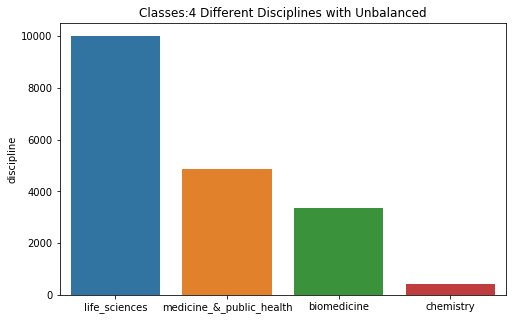

In [36]:
fig = mplt.figure(figsize=(8,5))
sns.barplot(x = train['discipline'].unique(), y=train['discipline'].value_counts())
mplt.title("Classes:4 Different Disciplines with Unbalanced")
mplt.show()


.'. Imbalanced Classes

In [37]:
nlp = spacy.load('en_core_web_sm')

In [38]:
import string
punctuations = string.punctuation

In [39]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

Cleaning Text using spaCy

In [40]:
import spacy

nlp = spacy.load('en_core_web_sm')
punctuations = string.punctuation

def cleanup_text(docs, logging=False):
    texts = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(docs)))
        counter += 1
        doc = nlp(doc, disable=['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)

Identifying most repeated keywords

In [41]:


INFO_text = [text for text in train[train['discipline'] == 'chemistry']['fulltext']]

IS_text = [text for text in train[train['discipline'] == 'medicine_&_public_health']['fulltext']]
INFO_clean = cleanup_text(INFO_text)
INFO_clean = ' '.join(INFO_clean).split()

IS_clean = cleanup_text("IS_text")
IS_clean = ' '.join(IS_clean).split()

INFO_counts = Counter(INFO_clean)
IS_counts = Counter(IS_clean)

INFO_common_words = [word[0] for word in INFO_counts.most_common(20)]
INFO_common_counts = [word[1] for word in INFO_counts.most_common(20)]



Showing most repeated words in pictorial representation

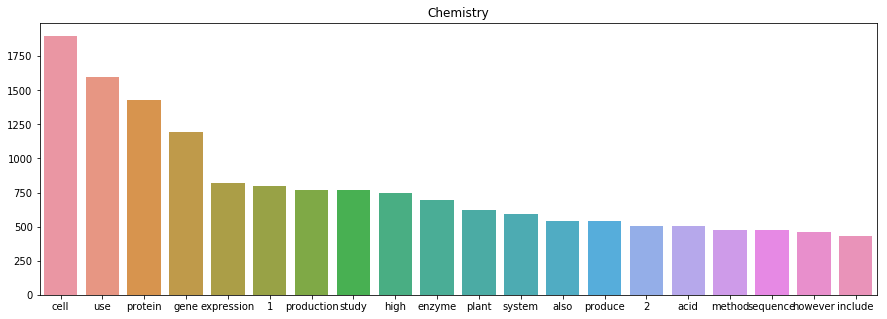

In [42]:
fig = mplt.figure(figsize=(15,5))
sns.barplot(x=INFO_common_words, y=INFO_common_counts)
mplt.title('Chemistry')
mplt.show()

Training the model

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
import string
import re
import spacy
spacy.load('en')
from spacy.lang.en import English
parser = English()

Cleaning of Data using spaCy

In [44]:
STOPLIST = set(stopwords.words('english') )
SYMBOLS = " ".join(string.punctuation).split(" ") + ["-", "...", "”", "”"]

class CleanTextTransformer(TransformerMixin):

   def transform(self, X, **transform_params):
        return [cleanText(text) for text in X]

   def fit(self, X, y=None, **fit_params):
        return self

   def get_params(self, deep=True):
        return {}
    
def cleanText(text):
    text = text.strip().replace("\n", " ").replace("\r", " ")
    text = text.lower()

def tokenizeText(sample):
    tokens = parser(sample)
    lemmas = []
    for tok in tokens:
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas
    tokens = [tok for tok in tokens if tok not in STOPLIST]
    tokens = [tok for tok in tokens if tok not in SYMBOLS]
    return tokens




Attenuating the null values

In [45]:
Data = Data[Data['abstract'].notnull()]

In [46]:
Data = Data[Data['fulltext'].notnull()]

In [47]:
def printNMostInformative(vectorizer, clf, N):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    topClass1 = coefs_with_fns[:N]
    topClass2 = coefs_with_fns[:-(N + 1):-1]
    print("Class 1 best: ")
    for feat in topClass1:
        print(feat)
    print("Class 2 best: ")
    for feat in topClass2:
        print(feat)

vectorizer = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,1))
clfs = [
   
    ("Linear SVC",LinearSVC()),
    ("BernoulliNB",BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)),
    ("MultinomialNB",MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)),
    ("LogisticRegression",LogisticRegression(random_state=0)),# RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    
]
for name, clf in clfs:
    clf_name = clf.__class__.__name__

    pipe = Pipeline([ ('vectorizer', vectorizer), ('clf', clf)])

# data
    train1 = train['fulltext'].values.astype('U').tolist()
    labelsTrain1 = train['discipline'].values.astype('U').tolist()

    test1 = test['fulltext'].values.astype('U').tolist()
    labelsTest1 = test['discipline'].values.astype('U').tolist()
# train
    pipe.fit(train1, labelsTrain1)

# test
    preds = pipe.predict(test1)
    print("accuracy:", accuracy_score(labelsTest1, preds))
    print("Top 10 features used to predict: ")

    printNMostInformative(vectorizer, clf, 10)


accuracy: 0.9238524238524238
Top 10 features used to predict: 
Class 1 best: 
(-0.25962687574891485, 'pressure')
(-0.2544393506297372, 'canine')
(-0.25059363495791437, 'cardiovascular')
(-0.23648556399552761, 'leg')
(-0.23207005918728235, 'elimination')
(-0.21472124528601513, '2nd')
(-0.20066993695559301, 'immunohistochemistry')
(-0.19950806756530892, 'injury')
(-0.18604441836058533, 'sex')
(-0.1846495628602041, 'dog')
Class 2 best: 
(1.0980141869707514, 'cancer_stem_cells')
(0.48989139539285226, 'july')
(0.4890978839090692, '2000')
(0.46937801764618026, 'cardiac')
(0.4454648033577397, 'advantage')
(0.42968360802071404, '0.88')
(0.42953648676430756, '.95')
(0.4259924931348096, '0.10')
(0.3843854471950344, 'knowledge')
(0.30485876250285326, 'recently')
accuracy: 0.9054054054054054
Top 10 features used to predict: 
Class 1 best: 
(-8.117908942383155, "''")
(-8.117908942383155, "'=")
(-8.117908942383155, "'s")
(-8.117908942383155, '(biogaia')
(-8.117908942383155, ',7')
(-8.117908942383155

As we are having Imbalanced data, Other Performance measures are also considered in addition to Accuracy

# from sklearn import metrics
print(metrics.classification_report(labelsTest1, preds,))

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(test1, preds)
fig, ax = mplt.subplots(figsize=(3,3))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=["abstract"], yticklabels= ["abstract"])
mplt.ylabel('Actual')
mplt.xlabel('Predicted')
mplt.show()